The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the data
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')

In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

#### Framework of Model Building

**Exploratory Data Analysis**

    * Univariate Analysis
    * Bivariate Analysis
    * Missing Value Interpretation
    * Outlier Analysis and Treatment
    * Feature Engineering
    * Statistical Hypothesis Testing
    * Categorical Variable Analysis and Encoding
    * Scaling and Transformation

Note: Post EDA you have entered into the Pre Modeling stage.

**Models**
    
    * Base Models- Average in case of Linear Regression, and in case of Classification - Highest Frequency
    * Linear Regression
    * Tree Based Models - Decision Tree, RandomForest, Gradient Boosting Machines etc.
    * Remember ALL models should be cross validated models.

In [8]:
# Combine the Train and Test Set

combined=pd.concat([train, test], axis=0, ignore_index=True )

combined.shape, train.shape, test.shape

((14204, 12), (8523, 12), (5681, 11))

### Univariate Analysis

* It represents Single Variable Analysis
* Splitting into Category and Numeric 
* Num_Vars: Distplot/Histogram
* Cat_Vars: Countplot

In [9]:
# Let's pull the list of numerical variables

nums=combined.select_dtypes(include=np.number).columns
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
cats=combined.select_dtypes(exclude=np.number).columns
cats

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<Figure size 1200x1000 with 0 Axes>

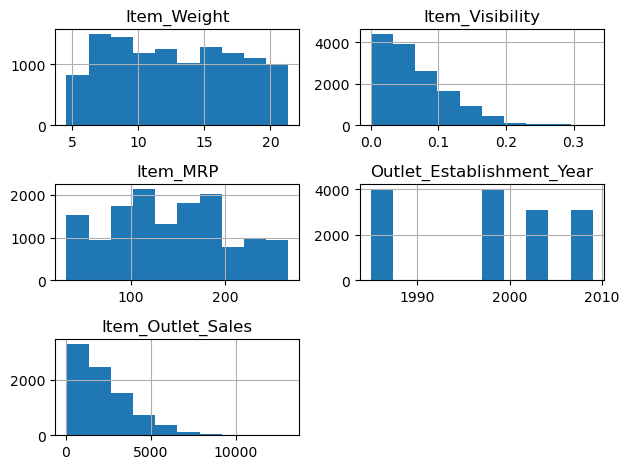

In [13]:
# Alternative of Loop
plt.figure(figsize=(12, 10))
combined.loc[:, nums].hist()
plt.tight_layout()
plt.show()

Item Weight is uniform in nature, randomly distrubuted
Item MRP has Multiple Modes
Sales is Positively Skewed

<Axes: xlabel='Item_MRP', ylabel='Density'>

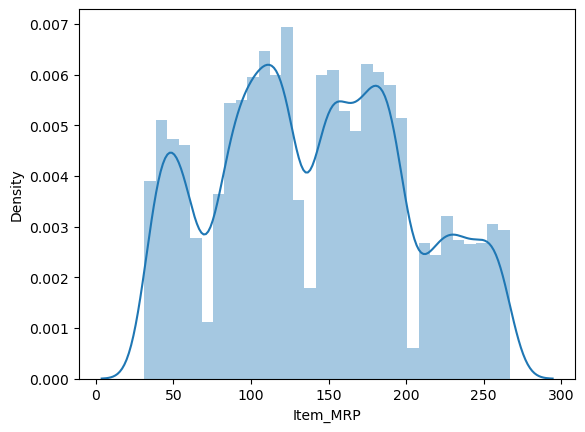

In [14]:
sns.distplot(combined.Item_MRP)

In [17]:
# Statistical Summary
# Concept of Outlier vs Inlier
combined[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


NOTE: If any column shows zero standard deviation, then that column is not providing at any value, so it should be excluded from further analysis

In [18]:
cats

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

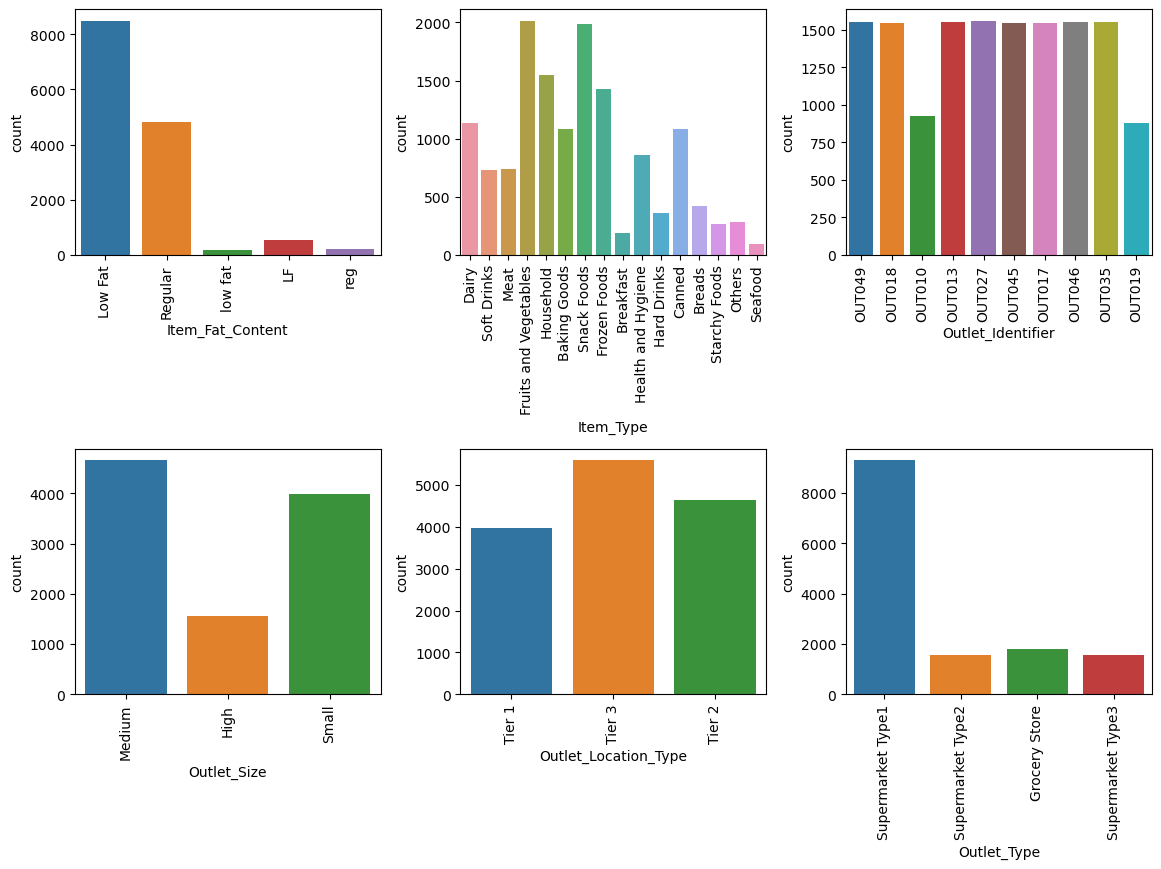

In [29]:
cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
nrows=2
ncols=3
iterator=1

plt.figure(figsize=(12, 8))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(data=combined, x=i)
    iterator+=1
    plt.tight_layout()
    plt.xticks(rotation =90)

plt.show()

In [ ]:
# lf, low fat reg ye sab noise hai machine ke liye.... Machine ko ye samjhana hoga
# Outlet_location Type: they are trying to tap the tier 2, 3, market

In [ ]:
# Mantra: You got to talk business to the man, they only understand the language of Profit and Loss.\\

# Rgett

In [30]:
combined.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

#### Bivariate Analysis

Cat vs Num: Boxplot

Num Vs Num: ScatterPlot

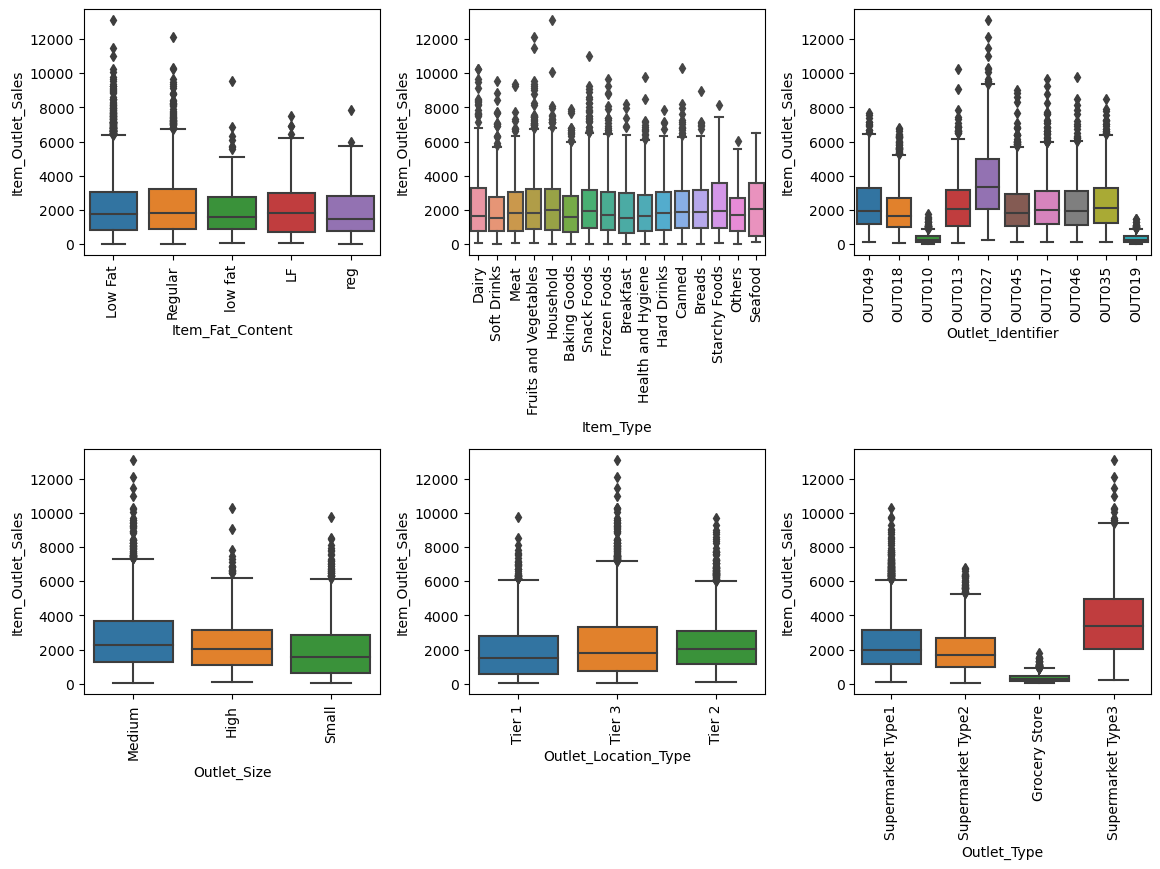

In [31]:
cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
nrows=2
ncols=3
iterator=1

plt.figure(figsize=(12, 8))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(data=combined, x=i, y='Item_Outlet_Sales')
    iterator+=1
    plt.tight_layout()
    plt.xticks(rotation =90)

plt.show()

In [34]:
combined['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}, inplace=True)

In [35]:
combined.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [36]:
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

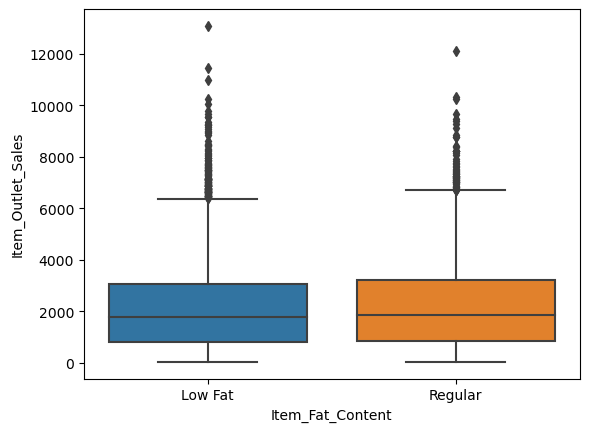

In [37]:
# Bivariate Analysis on Fat Content Again

sns.boxplot(data=combined, y='Item_Outlet_Sales', x='Item_Fat_Content')

In [40]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

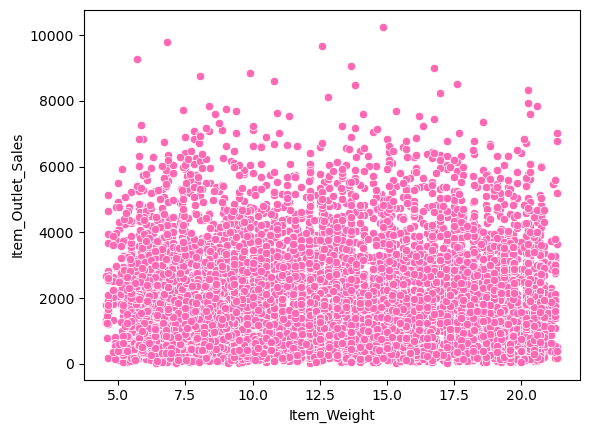

In [43]:
# Item_Weight vs Sales

sns.scatterplot(data=combined, x='Item_Weight', y='Item_Outlet_Sales', color='hotpink')

# Weight has no relation with the sales

In [48]:
# Let's pull a DataFrame head where Item Weight is missing
combined.loc[combined.Item_Weight.isnull(), ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

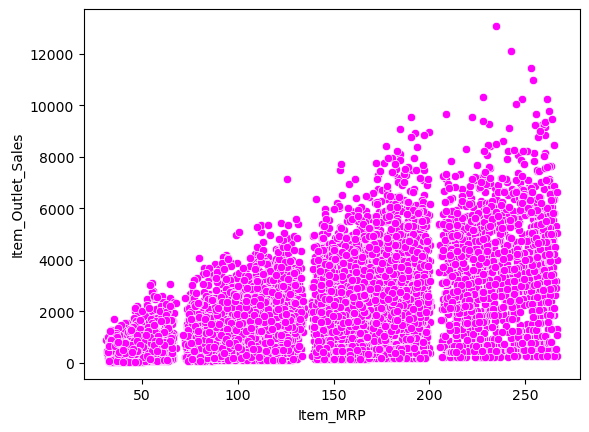

In [49]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=combined, color='magenta')

This is the most misleading graph.

Since, we know from reading the data that mrp is combined, and hence we are looking at that combined effect with sales in the graph. 

We understand that MRP is multimodal data which leads to multiple transactions combined together and hence we can conclude that there is a combination effect between mrp and sales.

In [50]:
combined.loc[combined.Item_Identifier=='FDP10', 'Item_Weight']

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [51]:
#Lets Make a dictionary

mapped=combined.groupby('Item_Identifier')['Item_Weight'].mean().to_dict
mapped

<bound method Series.to_dict of Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64>

In [57]:
# Impute the Missing Values
combined["Item_Weight"] = combined.groupby(by="Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [60]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [62]:
combined["Item_Visibility"] = combined.groupby(by="Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace=0, 
                                                                                                                    value=x.mean()))

In [63]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [64]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [65]:
combined.groupby(["Outlet_Identifier", "Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: count, dtype: int64

In [67]:
combined.loc[combined.Outlet_Size.isnull(), 'Outlet_Size']='Small'

In [68]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## Feature Engineering

1. Item Identifier


In [73]:
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])
ids

['FD',
 'DR',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'DR',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'DR',
 'NC',
 'FD',
 'NC',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'NC',
 'NC',
 'NC',

In [74]:
combined['Item_IDs']=pd.Series(ids)

In [75]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDs
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [76]:
perish = ['Dairy','Meat', 'Fruits and Vegetables',
         'Breakfast''Breads', 'Starchy Foods','Seafood']
def badaldo(x):
    if x in perish:
        return("Perishables")
    else:
        return("Non_Perishables")


In [77]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(badaldo)

In [78]:
combined.Item_Type_Cat.value_counts()

Item_Type_Cat
Non_Perishables    9961
Perishables        4243
Name: count, dtype: int64

<Axes: xlabel='Item_Type_Cat', ylabel='Item_Outlet_Sales'>

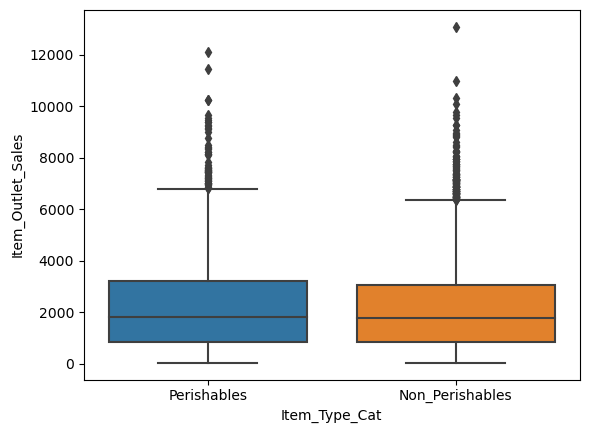

In [79]:
sns.boxplot(data=combined, x=combined['Item_Type_Cat'], y=combined['Item_Outlet_Sales'])

In [82]:
combined.loc[combined.Item_IDs=="NC", 
             "Item_Fat_Content"]="Non_Edible"

In [83]:
# Outlets

top = ["OUT027", "OUT013"]
worst = ["OUT010", "OUT019"]

def outlets(x):
    if x in top:
        return("Best")
    elif x in worst:
        return("Worst")
    else:
        return("Good")

In [84]:
combined["Outlets"] = combined.Outlet_Identifier.apply(outlets)

In [85]:
combined.Outlets.value_counts()

Outlets
Good     9287
Best     3112
Worst    1805
Name: count, dtype: int64

<Axes: xlabel='Outlets', ylabel='Item_Outlet_Sales'>

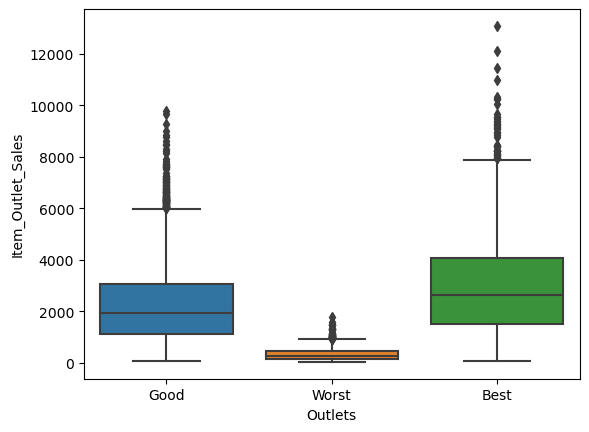

In [86]:
sns.boxplot(data=combined, x=combined['Outlets'], y=combined['Item_Outlet_Sales'])

In [87]:
# Drop the Unnecessary Columns now
combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis =1, 
              inplace = True)

In [88]:
# Label Encoding and Ordinal Encoding are the same things

In [89]:
# Outlet Size
mapped_size = {"Medium":3, "High":2, "Small":1}
mapped_outlet = {"Best":3, "Good":2, "Worst":1}
mapped_loc = {"Tier 3":3, "Tier 1":2, "Tier 2":1}

#combined.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

In [107]:
combined.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Location_Type,,,,,,,,
1,2785.0,2323.990559,1520.543543,99.8700,1171.80800,2004.0580,3110.6176,9664.7528
2,2388.0,1876.909159,1561.649293,33.9558,593.72715,1487.3972,2803.0180,9779.9362
3,3350.0,2279.627651,1912.451333,33.2900,731.38130,1812.3076,3307.6944,13086.9648


In [90]:
combined["Outlet_Size"] = combined["Outlet_Size"].map(mapped_size)
combined["Outlets"] = combined["Outlets"].map(mapped_outlet)
combined["Outlet_Location_Type"] = combined["Outlet_Location_Type"].map(mapped_loc)

In [91]:
combined.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDs,Item_Type_Cat,Outlets
0,9.30,Low Fat,0.016047,249.8092,3,2,Supermarket Type1,3735.1380,FD,Perishables,2
1,5.92,Regular,0.019278,48.2692,3,3,Supermarket Type2,443.4228,DR,Non_Perishables,2
2,17.50,Low Fat,0.016760,141.6180,3,2,Supermarket Type1,2097.2700,FD,Perishables,2
3,19.20,Regular,0.017834,182.0950,1,3,Grocery Store,732.3800,FD,Perishables,1
4,8.93,Non_Edible,0.009780,53.8614,2,3,Supermarket Type1,994.7052,NC,Non_Perishables,3


In [92]:
# one hot encoding
dummy = pd.get_dummies(combined, drop_first = True)

In [93]:
combined.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDs,Item_Type_Cat,Outlets
0,9.30,Low Fat,0.016047,249.8092,3,2,Supermarket Type1,3735.1380,FD,Perishables,2
1,5.92,Regular,0.019278,48.2692,3,3,Supermarket Type2,443.4228,DR,Non_Perishables,2
2,17.50,Low Fat,0.016760,141.6180,3,2,Supermarket Type1,2097.2700,FD,Perishables,2
3,19.20,Regular,0.017834,182.0950,1,3,Grocery Store,732.3800,FD,Perishables,1
4,8.93,Non_Edible,0.009780,53.8614,2,3,Supermarket Type1,994.7052,NC,Non_Perishables,3


In [94]:
dummy.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlets,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_IDs_FD,Item_IDs_NC,Item_Type_Cat_Perishables
0,9.30,0.016047,249.8092,3,2,3735.1380,2,False,False,True,False,False,True,False,True
1,5.92,0.019278,48.2692,3,3,443.4228,2,False,True,False,True,False,False,False,False
2,17.50,0.016760,141.6180,3,2,2097.2700,2,False,False,True,False,False,True,False,True
3,19.20,0.017834,182.0950,1,3,732.3800,1,False,True,False,False,False,True,False,True
4,8.93,0.009780,53.8614,2,3,994.7052,3,True,False,True,False,False,False,True,False


In [117]:
dummy.shape

(14204, 15)

In [95]:
# Split the Data into Train and Test
newtrain = dummy.loc[0:train.shape[0]-1, ]
newtest = dummy.loc[train.shape[0]:, ]

In [111]:
train.shape[0]-1

8522

In [113]:
train.shape

(8523, 12)

In [114]:
train.shape[0]

8523

In [115]:
train.shape[0]

8523

In [116]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [112]:
dummy.loc[0:train.shape[0]-1]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlets,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_IDs_FD,Item_IDs_NC,Item_Type_Cat_Perishables
0,9.300,0.016047,249.8092,3,2,3735.1380,2,False,False,True,False,False,True,False,True
1,5.920,0.019278,48.2692,3,3,443.4228,2,False,True,False,True,False,False,False,False
2,17.500,0.016760,141.6180,3,2,2097.2700,2,False,False,True,False,False,True,False,True
3,19.200,0.017834,182.0950,1,3,732.3800,1,False,True,False,False,False,True,False,True
4,8.930,0.009780,53.8614,2,3,994.7052,3,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2,3,2778.3834,3,False,False,True,False,False,True,False,False
8519,8.380,0.046982,108.1570,1,1,549.2850,2,False,True,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,1,1,1193.1136,2,True,False,True,False,False,False,True,False
8521,7.210,0.145221,103.1332,3,3,1845.5976,2,False,True,False,True,False,True,False,False


In [96]:
# Drop the Target from the Test set
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

In [97]:
train.shape,test.shape,newtrain.shape,newtest.shape

((8523, 12), (5681, 11), (8523, 15), (5681, 14))

In [98]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [99]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

X = newtrain.drop("Item_Outlet_Sales", axis =1)
y = newtrain.Item_Outlet_Sales

lr = LinearRegression()

predictions = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_test = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
    # Model
    pred = lr.fit(xtrain, ytrain).predict(newtest)
    predictions.append(pred)

In [100]:
pd.DataFrame(predictions).T

,0,1,2,3,4
0,1854.707048,1847.057823,1830.013895,1854.139883,1825.820807
1,1535.424958,1522.591500,1527.310230,1518.435887,1553.258783
2,1865.024228,1865.003569,1886.461248,1859.223808,1825.472473
3,2564.603672,2499.525521,2529.094035,2514.260438,2560.975629
4,5170.983927,5147.283003,5246.066398,5206.062446,5195.559246
...,...,...,...,...,...
5676,2329.782138,2307.289422,2305.982844,2316.621520,2312.656291
5677,2440.285657,2434.318512,2460.525835,2449.003125,2458.288828
5678,1953.653621,1920.037668,1938.573153,1910.771875,1947.182209
5679,3494.343853,3447.102741,3516.720785,3466.880898,3509.306883


In [103]:
final_pred=pd.DataFrame(predictions).T.mean(axis=1)

In [105]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(final_pred)})

In [106]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1842.347891
1,FDW14,OUT017,1531.404271
2,NCN55,OUT010,1860.237065
3,FDQ58,OUT017,2533.691859
4,FDY38,OUT027,5193.191004
...,...,...,...
5676,FDB58,OUT046,2314.466443
5677,FDD47,OUT018,2448.484392
5678,NCO17,OUT045,1934.043705
5679,FDJ26,OUT017,3486.871032
